# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [36]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,8))

In [37]:
dataset = pd.read_csv('dados/alugueis_residencial_tratado_melhorado.csv', sep = ';')
dataset

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Casa
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22348,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22349,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Casa
22350,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22351,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


## Box-plot

<img src = "Extras\box_plot.png">

In [38]:
#Box-plot possui a seguinte configuração: temos uma mediana, em que dividimos os dados em 50%, para a direita e esquerda, igualmente.
#Q1, que se refere ao primeiro quartil e parte em 25% e 75%
#Q3 parte os dados em 75% e 25%
#A diferente entre Q3 e Q1 gera o intervalo interquartirico, isto é, as estatísticas que geraremos para realizar o corte de outliers.

<AxesSubplot: >

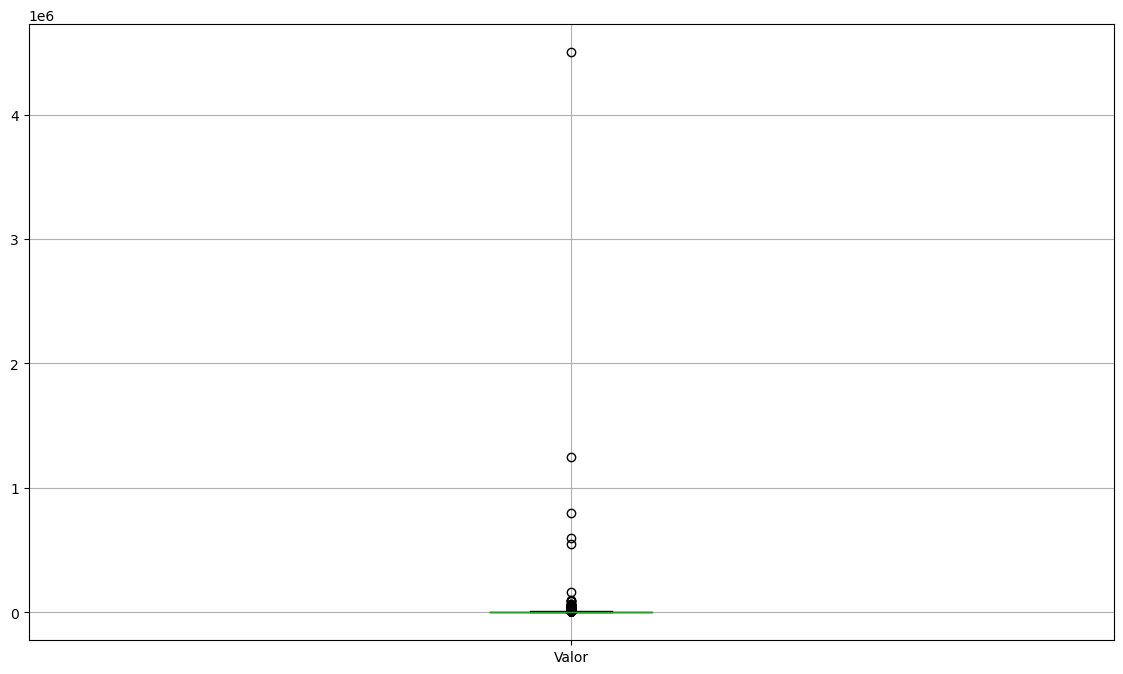

In [39]:
#criar Box-plot
#está invertido e só conseguimos perceber os dados discrepantes.
dataset.boxplot(['Valor'])

In [40]:
#Visualizar melhor os dados discrepantes
dataset[dataset['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7819,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10895,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12975,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14181,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15895,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [41]:
#Criar uma series com apenas a coluna valor para facilitar a análise
valor = dataset['Valor']
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
22348     900.0
22349     800.0
22350    1800.0
22351    1400.0
22352    3000.0
Name: Valor, Length: 22353, dtype: float64

In [42]:
#Calcular o Q1 (primeiro quartil)
Q1 = valor.quantile(.25)
Q1

1600.0

In [43]:
#Calcular o Q3 (terceiro quartil)
Q3 = valor.quantile(.75)
Q3

5500.0

In [44]:
#Calcular o intervalo inter quartil
IIQ = Q3 - Q1
IIQ

3900.0

In [45]:
#Calcular o limite inferior
limite_inferior = Q1 - (1.5 * IIQ)
limite_inferior

-4250.0

In [46]:
#Calcular limite superior
limite_superior = Q3 + (1.5 * IIQ)
limite_superior

11350.0

In [47]:
#Selecionar os dados que estão dentro dos limites
dataset_new = dataset[(valor >= limite_inferior) & (valor <= limite_superior)]
dataset_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Casa
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22348,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22349,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Casa
22350,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22351,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot: >

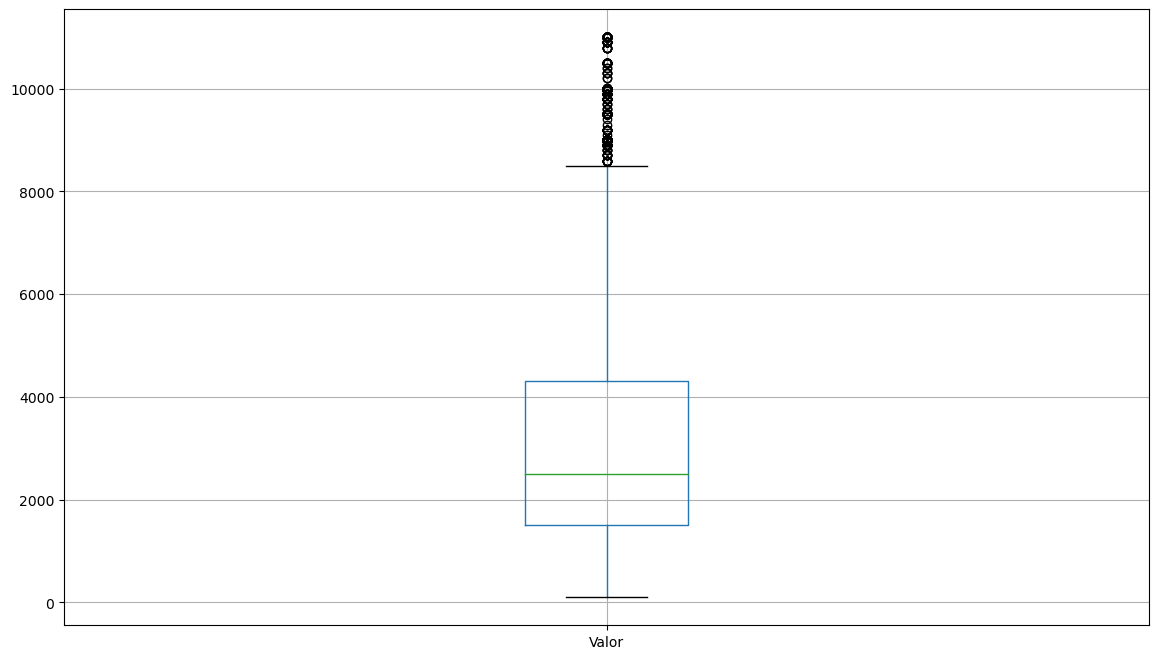

In [48]:
#O box-plot indica que existem dados discrepantes de 10000 de condomínio, mas em nosso banco de dados realmente existem imóveis de alto padrão que apresentam esse valor
dataset_new.boxplot(['Valor'])

## Histograma
#### distribuição de frequências dos dados

array([[<AxesSubplot: title={'center': 'Valor'}>]], dtype=object)

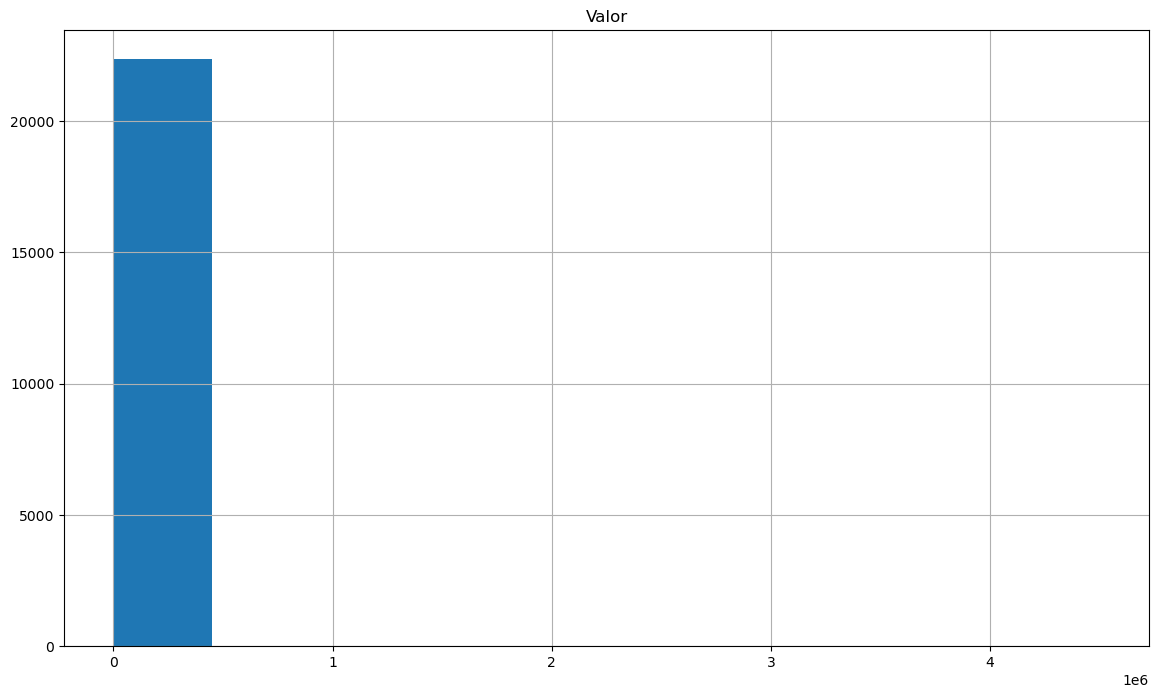

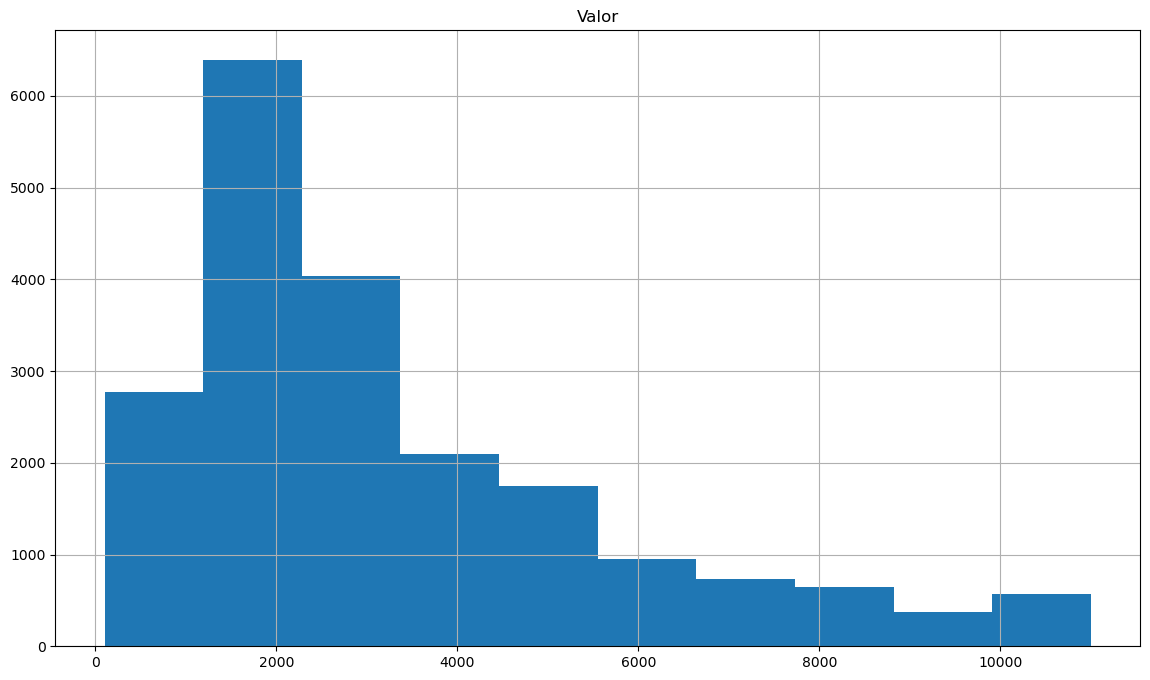

In [49]:
#Para dataset é apenas uma barra
#Mas em dataset_new existe uma distribuição de barras que nos permite algumas análises.
#Seriam necessários alguns tratamentos antes de utilizar essas informações em uma regressão, por exemplo.
dataset.hist(['Valor'])
dataset_new.hist(['Valor'])

## Identificando e Removendo Outliers por Grupos

<AxesSubplot: title={'center': 'Valor'}, xlabel='Tipo'>

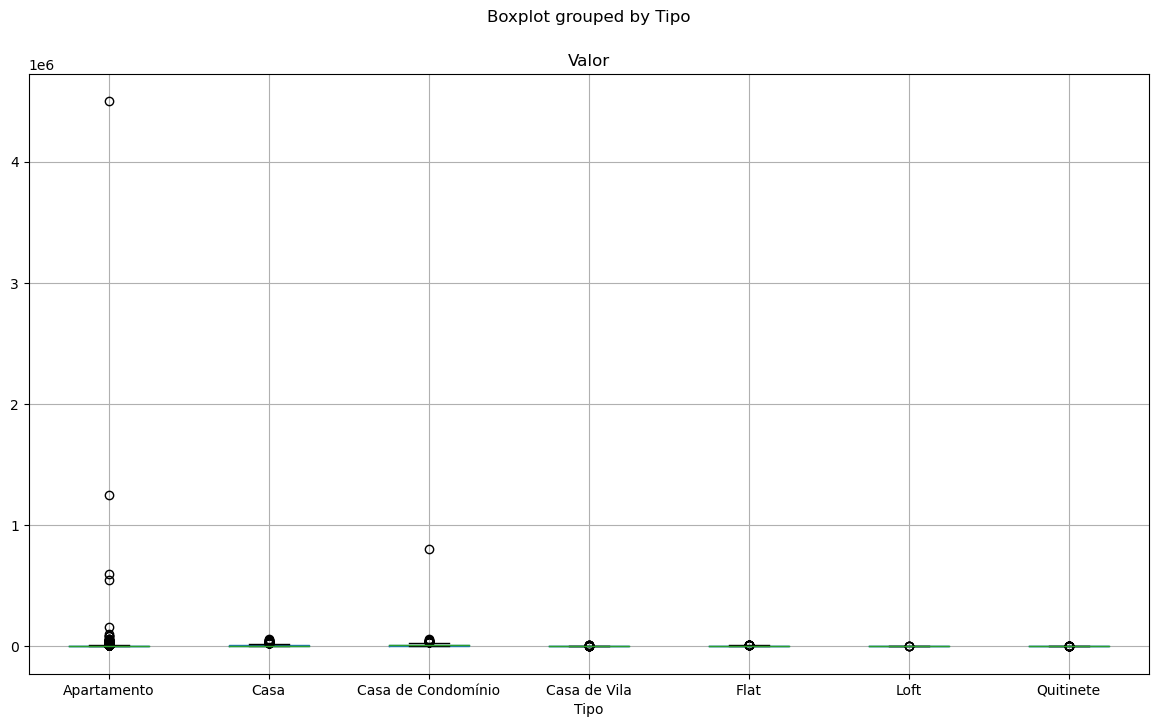

In [50]:
#Mostra o Box-plot por tipo
# Ap e Casa de COndominio estão com os dados mais discrepantes
dataset.boxplot(['Valor'], by= 'Tipo')

In [51]:
#Cria um grupo dos tipos com apenas a variavel valor
grupo_tipo = dataset.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [52]:
#Ddicionario com a chave (tipo) e os valores (indices que o tipo aparece)
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 14, 15, 16, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, ...], 'Casa': [1, 24, 56, 59, 98, 102, 148, 164, 184, 244, 256, 259, 270, 293, 317, 323, 341, 346, 364, 385, 392, 406, 431, 441, 482, 483, 489, 519, 551, 552, 577, 582, 583, 629, 632, 641, 646, 647, 671, 687, 711, 732, 736, 772, 783, 793, 870, 889, 955, 1000, 1048, 1056, 1141, 1146, 1148, 1180, 1201, 1274, 1281, 1342, 1361, 1376, 1399, 1443, 1457, 1461, 1472, 1477, 1504, 1507, 1520, 1619, 1638, 1691, 1697, 1701, 1707, 1720, 1746, 1754, 1800, 1851, 1876, 1917, 1947, 1976, 1985, 2003, 2063, 2083, 2100, 2119, 2146, 2152, 2153, 2178, 2216, 2247, 2250, 2257, ...], 'Ca

In [53]:
#Todos estão em formato diferente (Series)
Q1_ = grupo_tipo.quantile(.25)
Q3_ = grupo_tipo.quantile(.75)
IIQ_ = Q3_ - Q1_
limite_inf = Q1_ - 1.5 * IIQ
limite_sup = Q3_ + 1.5 * IIQ

In [54]:
#Formato Series
Q1_

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Flat                  2500.0
Loft                  1750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [55]:
Q3_

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Flat                   6000.0
Loft                   3000.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [56]:
limite_inf

Tipo
Apartamento          -4150.0
Casa                 -4750.0
Casa de Condomínio   -1850.0
Casa de Vila         -5100.0
Flat                 -3350.0
Loft                 -4100.0
Quitinete            -4950.0
Name: Valor, dtype: float64

In [57]:
limite_sup

Tipo
Apartamento           10850.0
Casa                  15650.0
Casa de Condomínio    21100.0
Casa de Vila           7650.0
Flat                  11850.0
Loft                   8850.0
Quitinete              7350.0
Name: Valor, dtype: float64

In [58]:
#Acessando limite superior de um Apartamento
limite_sup['Apartamento']

10850.0

In [59]:
#Pegando as chaves do dicionario de grupo
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Flat
Loft
Quitinete


In [60]:
#Seleção em grupo com mais de um tipo de variavel (tipo, valor)
dataset_new_ = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dataset['Tipo'] == tipo
    eh_dentro_limite = (dataset['Valor'] >= limite_inf[tipo]) & (dataset['Valor'] <= limite_sup[tipo]) #coloca o [tipo] para pegar o valor para cada tipo por vez já que se trata de uma Series
    selecao = eh_tipo & eh_dentro_limite
    dataset_selecao = dataset[selecao]
    dataset_new_ = pd.concat([dataset_new_, dataset_selecao])

array([[<AxesSubplot: title={'center': 'Apartamento'}>,
        <AxesSubplot: title={'center': 'Casa'}>,
        <AxesSubplot: title={'center': 'Casa de Condomínio'}>],
       [<AxesSubplot: title={'center': 'Casa de Vila'}>,
        <AxesSubplot: title={'center': 'Flat'}>,
        <AxesSubplot: title={'center': 'Loft'}>],
       [<AxesSubplot: title={'center': 'Quitinete'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

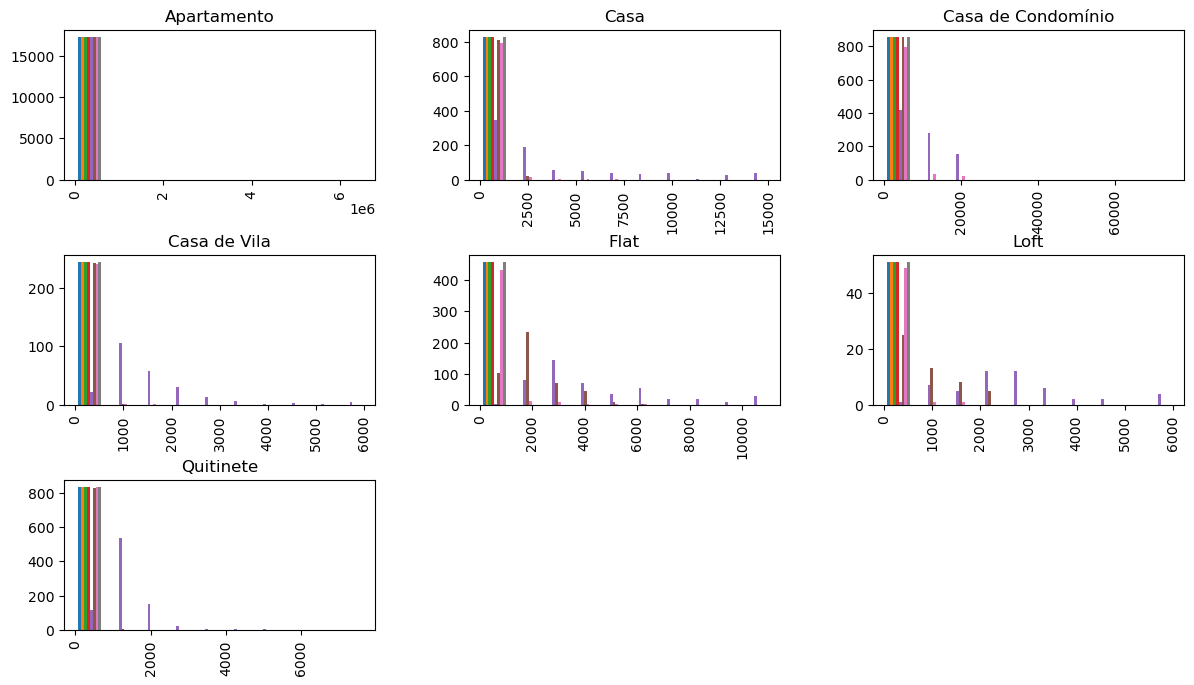

In [66]:
#for tipo in grupo_tipo.groups.keys():
dataset_new_.hist(by='Tipo')   

<AxesSubplot: title={'center': 'Valor'}, xlabel='[Tipo]'>

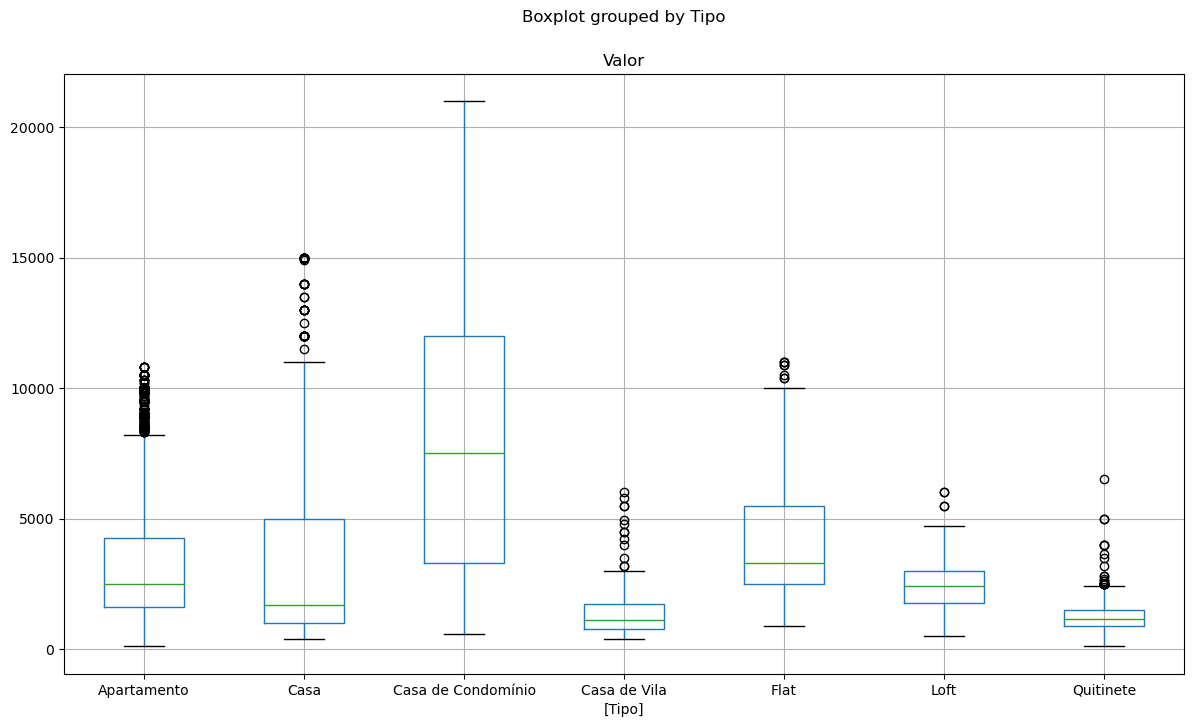

In [61]:
dataset_new_.boxplot(['Valor'], by = ['Tipo'])

In [62]:
#Exportação
dataset_new_.to_csv('dados/alugueis_residencial_tratado_melhorado_sem_outliers.csv', sep = ';', index= False)